### Approximating sine function on [-0.5, 0.5] with polynomial

Text(0.5, 1.0, 'Approximation error for sin(x)')

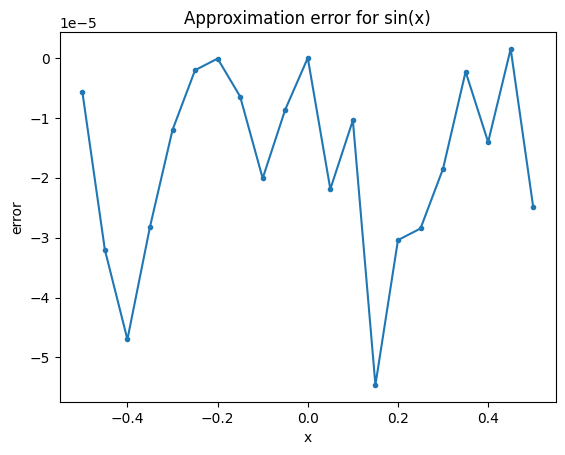

In [1]:
from psiqworkbench import QPU, QFixed
from qmath.poly import EvalFunctionPPA

import numpy as np
from matplotlib import pyplot as plt

qpu = QPU(filters=[">>64bit>>", ">>bit-sim>>"])
qpu.reset(400)

interval = (-0.5, 0.5)
func = EvalFunctionPPA(np.sin, interval=(-0.5, 0.5), degree=4, error_tol=1e-4)

x_range = np.linspace(interval[0], interval[1], 21)
err = []
qx = QFixed(20,name="qx", radix=15, qpu=qpu)
    
for x in x_range:
    qx.write(x)
    with func.computed(qx):
        result = func.get_result_qreg().read()
    expected = np.sin(x)
    err.append(result - expected)

plt.plot(x_range, err, marker='.')
plt.xlabel("x")
plt.ylabel("error")
plt.title("Approximation error for sin(x)")